In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
import requests

In [15]:
s = pd.Series(np.random.randn(4), name='daily returns')
s*100 # %로 표현하기

0   -64.426339
1   -32.042181
2   -77.639526
3    36.259967
Name: daily returns, dtype: float64

In [17]:
s.describe() #요약통계량

count    4.000000
mean    -0.344620
std      0.508908
min     -0.776395
25%     -0.677296
50%     -0.482343
75%     -0.149666
max      0.362600
Name: daily returns, dtype: float64

In [19]:
s.index = ['stock_1', 'stock_2', 'stock_3', 'stock_4']
s

stock_1   -0.644263
stock_2   -0.320422
stock_3   -0.776395
stock_4    0.362600
Name: daily returns, dtype: float64

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [96]:
df2 = df2.set_index('country')
df2

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [97]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [98]:
df[['country', 'year']]

,country,year
0,Argentina,2000
1,Australia,2000
2,India,2000
3,Israel,2000
4,Malawi,2000
5,South Africa,2000
6,United States,2000
7,Uruguay,2000


In [99]:
df[['country', "tcgdp"]]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


In [100]:
df.iloc[1:2, 0:5]

,country,country isocode,year,POP,XRAT
1,Australia,AUS,2000,19053.186,1.72483


In [101]:
df.loc[df.index[0:2],['country', 'tcgdp']]

,country,tcgdp
0,Argentina,295072.21869
1,Australia,541804.65210


In [102]:
df = df[["country","POP","tcgdp"]]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [103]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [105]:
df.columns = 'population', 'Total GDP'
df

,population,Total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [106]:
df['population'] = df['population'] * 1e3
df

,population,Total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [109]:
df["GDP per Cap"] = df['Total GDP']*1e6/df['population']
df

,population,Total GDP,GDP per Cap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


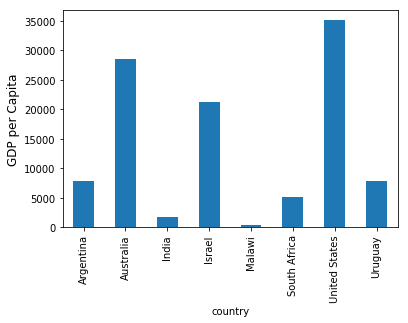

In [113]:
ax = df['GDP per Cap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=10)
ax.set_ylabel('GDP per Capita', fontsize=12)
plt.show()

In [114]:
df = df.sort_values(by='GDP per Cap')
df

,population,Total GDP,GDP per Cap
country,,,
Malawi,1.180150e+07,5.026222e+03,425.896679
India,1.006300e+09,1.728144e+06,1717.324719
South Africa,4.506410e+07,2.272424e+05,5042.647686
Uruguay,3.219793e+06,2.525596e+04,7843.970620
Argentina,3.733565e+07,2.950722e+05,7903.229085
Israel,6.114570e+06,1.292539e+05,21138.672749
Australia,1.905319e+07,5.418047e+05,28436.433261
United States,2.821720e+08,9.898700e+06,35080.381854


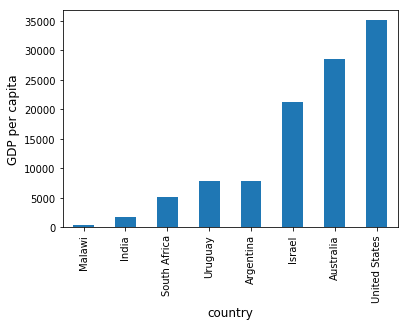

In [117]:
ax = df['GDP per Cap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [118]:
df = df.sort_values(by='GDP per Cap', ascending = False)

In [119]:
df

,population,Total GDP,GDP per Cap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


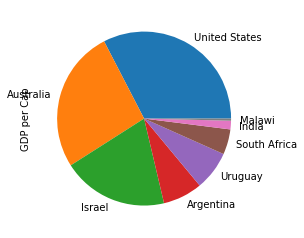

In [121]:
ax= df['GDP per Cap'].plot(kind = 'pie')
plt.show()

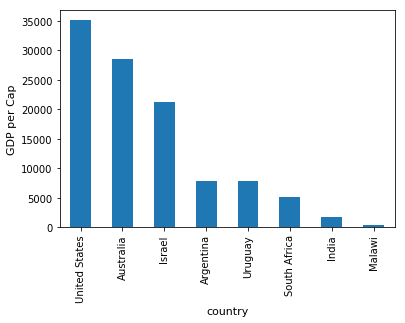

In [122]:
ax = df['GDP per Cap'].plot(kind='bar')
ax.set_xlabel('country', fontsize = 11)
ax.set_ylabel('GDP per Cap', fontsize = 11)
plt.show()

##  Request Online Data Sources from FRED

In [126]:
# 호출 명령
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

In [133]:
# 일단 호출한 다음, 해당 csv 데이터셋을 담을 변수를 설정
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [134]:
source[1]

'1948-01-01,3.4\r'

In [135]:
fred = pd.read_csv(url, 
                   index_col=0, 
                   parse_dates=True)

In [257]:
fred.head()

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [138]:
fred.describe()  # Your output might differ slightly

,VALUE
count,881.000000
mean,5.768445
std,1.702272
min,2.500000
25%,4.500000
50%,5.600000
75%,6.800000
max,14.800000


In [140]:
pd.set_option('precision', 2) #pandas에서 다루는 모든 데이터셋의 decimal 결정
fred.describe()

,VALUE
count,881.00
mean,5.77
std,1.70
min,2.50
25%,4.50
50%,5.60
75%,6.80
max,14.80


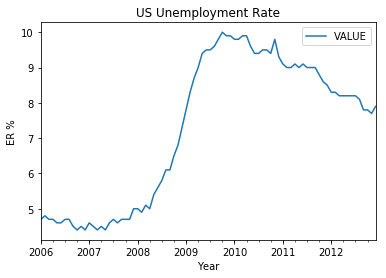

In [148]:
ax = fred['2006':'2012'].plot(title='US Unemployment Rate', legend=True)
ax.set_xlabel("Year", fontsize = 10)
ax.set_ylabel("ER %", fontsize =10)
plt.show()

### Exercises

In [149]:
import datetime as dt
import yfinance as yf

In [152]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
                'IBM': 'IBM',
                'AAPL': 'Apple',
                'AMZN': "Amazon"}

In [166]:
def read_data (ticker_list,
              start=dt.datetime(2020,1,2),
              end = dt.datetime(2020,12,31)):

    ticker = pd.DataFrame()

    for tick in ticker_list:
        stock = yf.Ticker(tick)
        prices = stock.history(start=start, end=end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices
    
    return ticker

ticker = read_data(ticker_list)

p1 = ticker.iloc[0]
p2 = ticker.iloc[-1]
YoY = (p2/p1-1)*100
YoY

INTC   -17.88
MSFT    39.48
IBM     -3.37
AAPL    79.62
AMZN    73.12
dtype: float64

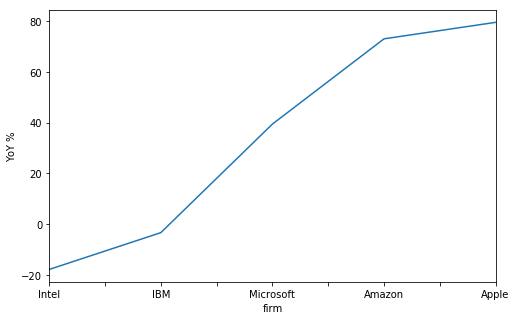

In [173]:
YoY.sort_values(inplace=True)
YoY = YoY.rename(index=ticker_list)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlabel("firm", fontsize = 10)
ax.set_ylabel("YoY %", fontsize = 10)
YoY.plot()
plt.show()

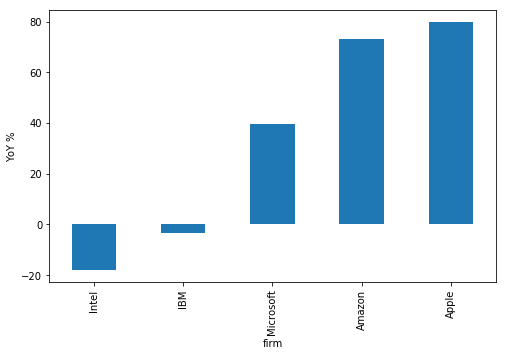

In [174]:
YoY.sort_values(inplace=True)
YoY = YoY.rename(index=ticker_list)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlabel("firm", fontsize = 10)
ax.set_ylabel("YoY %", fontsize = 10)
YoY.plot(kind='bar', ax=ax)
plt.show()

In [176]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
indices_list

{'^GSPC': 'S&P 500', '^IXIC': 'NASDAQ', '^DJI': 'Dow Jones', '^N225': 'Nikkei'}

In [181]:
indices_data = read_data(
        indices_list,
        start=dt.datetime(1971, 1, 1),  #Common Start Date
        end=dt.datetime(2020, 12, 31)
)

indices_data.describe()

,^GSPC,^IXIC,^DJI,^N225
count,12612.00,12587.00,7305.00,11917.00
mean,880.98,1890.75,12236.06,14063.61
std,822.17,2272.88,6423.76,7352.83
min,62.28,54.87,3136.60,1981.74
25%,154.90,247.35,8443.99,8076.62
50%,607.94,1055.31,10729.52,13592.47
75%,1316.80,2514.75,15470.67,19262.53
max,3735.36,12899.42,30409.56,38915.87


In [183]:
yearly_returns = pd.DataFrame()

for index, name in indices_list.items():
    p1 = indices_data.groupby(indices_data.index.year)[index].first()  # Get the first set of returns as a DataFrame
    p2 = indices_data.groupby(indices_data.index.year)[index].last()   # Get the last set of returns as a DataFrame
    returns = (p2 - p1) / p1
    yearly_returns[name] = returns

yearly_returns.head()

,S&P 500,NASDAQ,Dow Jones,Nikkei
Date,,,,
1970,0.00,NaN,NaN,NaN
1971,0.12,0.14,NaN,0.36
1972,0.16,0.18,NaN,0.92
1973,-0.18,-0.32,NaN,-0.18
1974,-0.30,-0.35,NaN,-0.10


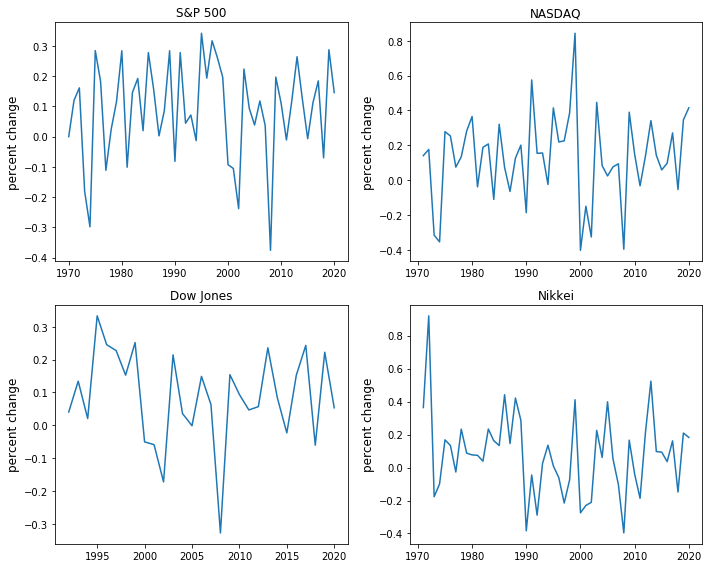

In [184]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for iter_, ax in enumerate(axes.flatten()):            # Flatten 2-D array to 1-D array
    index_name = yearly_returns.columns[iter_]         # Get index name per iteration
    ax.plot(yearly_returns[index_name])                # Plot pct change of yearly returns per index
    ax.set_ylabel("percent change", fontsize = 12)
    ax.set_title(index_name)

plt.tight_layout()

In [185]:
test_vector = [1,2,3,4]
test_vector

[1, 2, 3, 4]

In [208]:
for x in test_vector :
    print([x, x*2])

[1, 2]
[2, 4]
[3, 6]
[4, 8]


In [193]:
for x in test_vector:
    print (2*x+3*x**2-3)

2
13
30
53


In [199]:
test_vector2 = ["안","녕","하","세","요"]
for i in test_vector2:
    print(i, len(i)*2)

안 2
녕 2
하 2
세 2
요 2


In [205]:
test_vector3 = range(0,10)
list(test_vector3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [207]:
for i in range(0,5):
    print(i*2)

0
2
4
6
8


In [235]:
from pandas import DataFrame

df_left = pd.DataFrame({'KEY': ['K0', 'K1', 'K2', 'K3'],
   'A': ['A0', 'A1', 'A2', 'A3'],
   'B': ['B0', 'B1', 'B2', 'B3']})

df_right = pd.DataFrame({'KEY' : ['K4', 'K5', 'K6', 'K7'],
'C' : ['C0', 'C1', 'C2', 'C3'],
'D' : ['D0', 'D1', 'D2', 'D3']})


In [251]:
df_left.set_index('KEY')

,A,B
KEY,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,B3


In [253]:
df_right.set_index('KEY')

,C,D
KEY,,
K4,C0,D0
K5,C1,D1
K6,C2,D2
K7,C3,D3


In [256]:
df_merge_how_left = pd.merge(df_left, df_right, how = 'left', on='KEY')
df_merge_how_left.set_index('KEY')

,A,B,C,D
KEY,,,,
K0,A0,B0,NaN,NaN
K1,A1,B1,NaN,NaN
K2,A2,B2,NaN,NaN
K3,A3,B3,NaN,NaN
